In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
# rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14


# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
divisor = 5
sample_freq = (62.5 / divisor) * u.MHz 
dt = (1 / sample_freq).to(u.ns)

N_samples = 16000

# sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

# freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

In [3]:
freqs_to_test = np.arange(.1,1.1,.1) * sample_freq

In [4]:
PF_N128_sec3_4 = np.loadtxt('PF_N128_sec3_4.txt')
PF_N256_sec3_4 = np.loadtxt('PF_N256_sec3_4.txt')
PF_N512_sec3_4 = np.loadtxt('PF_N512_sec3_4.txt')
PF_N1024_sec3_4 = np.loadtxt('PF_N1024_sec3_4.txt')

LP_dfts = [PF_N128_sec3_4,PF_N256_sec3_4,PF_N512_sec3_4,PF_N1024_sec3_4]

In [5]:
def dft_f_range(dft_samples = 2**7):
    delta_nu = (1 / (dft_samples * dt.to(u.s))).to(u.MHz) # Freq per dft bin
    return delta_nu.value * (np.arange(0,dft_samples) - dft_samples/2)

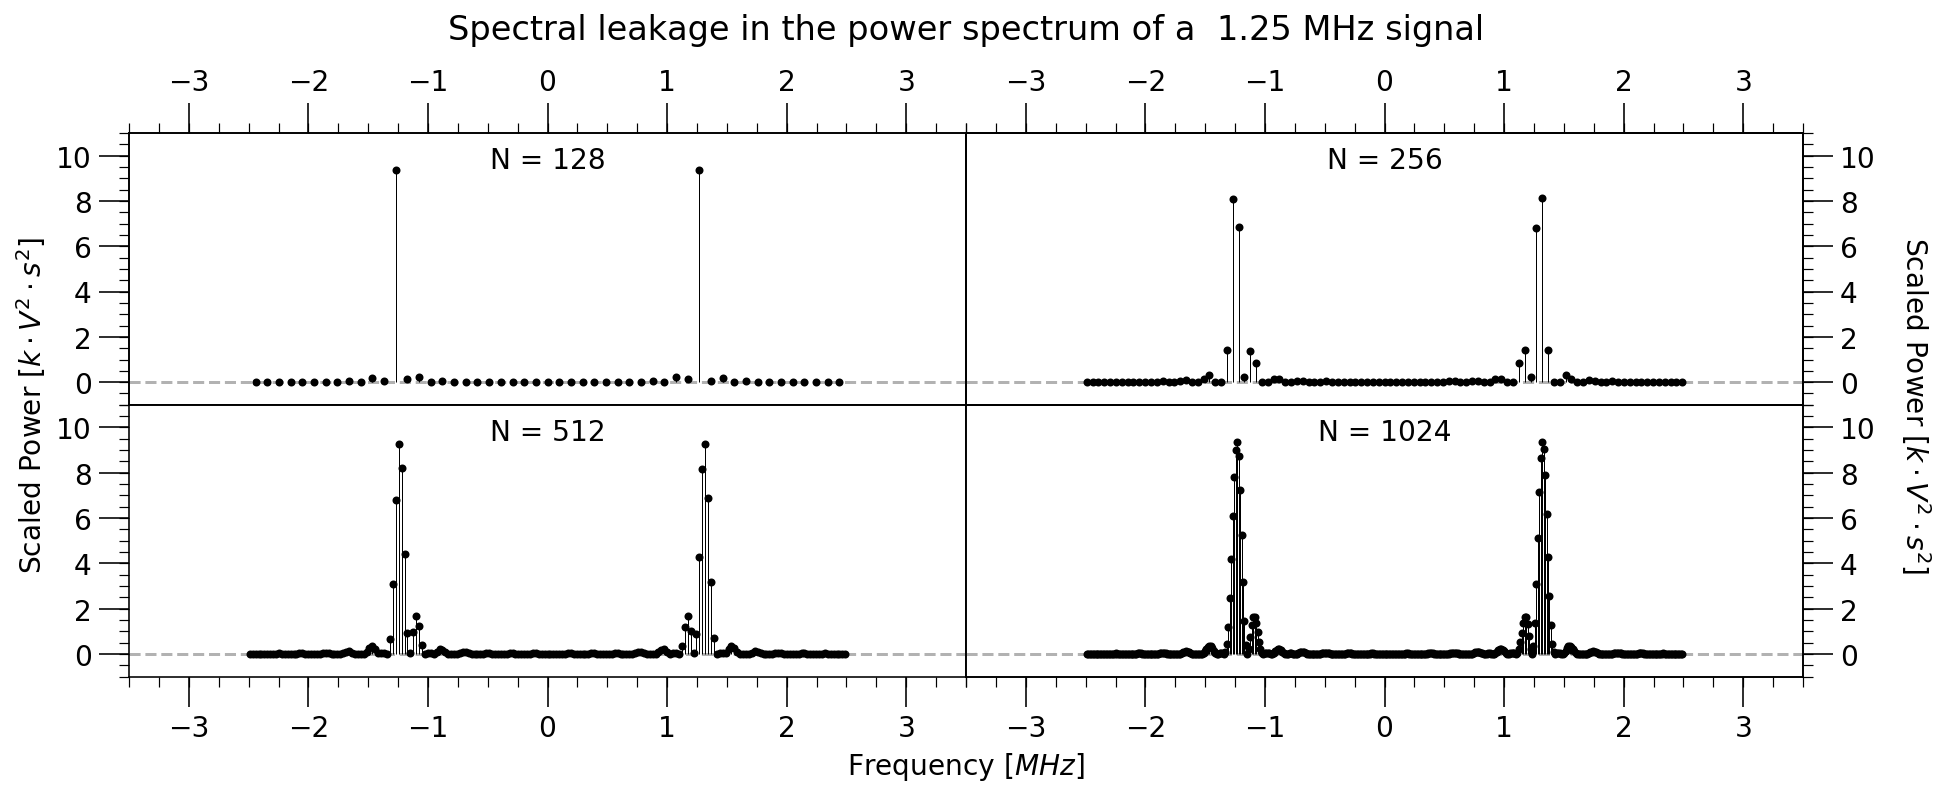

In [8]:
N_values = 2**np.arange(7,11)

PLOT_SCALE = 1e3 / 10

fig, axes = plt.subplots(2,2, figsize = (15,5)) 

for i , ax in enumerate(axes.reshape(-1)):

    # Plot points
    ax.plot(dft_f_range(N_values[i])[abs(dft_f_range(N_values[i])) < 2.5],
            LP_dfts[i][abs(dft_f_range(N_values[i])) < 2.5] / PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            color = 'black',
            markersize = 3)
    
    # Plot baseline
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3)
    
    # Plot connecting lines
    ax.vlines(dft_f_range(N_values[i])[abs(dft_f_range(N_values[i])) < 2.5],
              ymin = 0,
              ymax = LP_dfts[i][abs(dft_f_range(N_values[i])) < 2.5] / PLOT_SCALE,
              color = 'black',
              linewidth = 0.5)


    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # set limits and fix yticks
    ax.set_xlim(-3.5,3.5)
    ax.set_ylim(-1, 11)


    
    ax.text(0.5, 0.9,
            'N = %d' %N_values[i],
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    # set ticks for left side of plotgrid
    if (i % 2) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
    # set ticks for right side of plotgrid        
    if (i % 2) == 1:
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(2))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
    
#     # set ticks for top side of plotgrid
    if i < 2:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(-3,4))
        ax_top.xaxis.set_major_locator(MultipleLocator(1))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.25))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)

        
#     # set ticks for bottom side of plotgrid
    if i > 1:

        ax.set_xticks(np.arange(-3,4))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    if i == 0:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', x = 0, y = 0)
    
    if i == 1:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 65, x= 0, y = 0)
        ax.yaxis.set_label_position('right')
        
    if i == 2:
        ax.set_xlabel(r'Frequency $[MHz]$', x = 1, y = 0)
    
    if i == 1:
        ax.set_title(r'Spectral leakage in the power spectrum of a  1.25 MHz signal', x = 0, y = 1.3)

plt.subplots_adjust(hspace=0, wspace = 0)  

plt.show()
fig.savefig('leakage_power_3_4.pdf', dpi = 'figure', format = 'pdf', transparent = True)

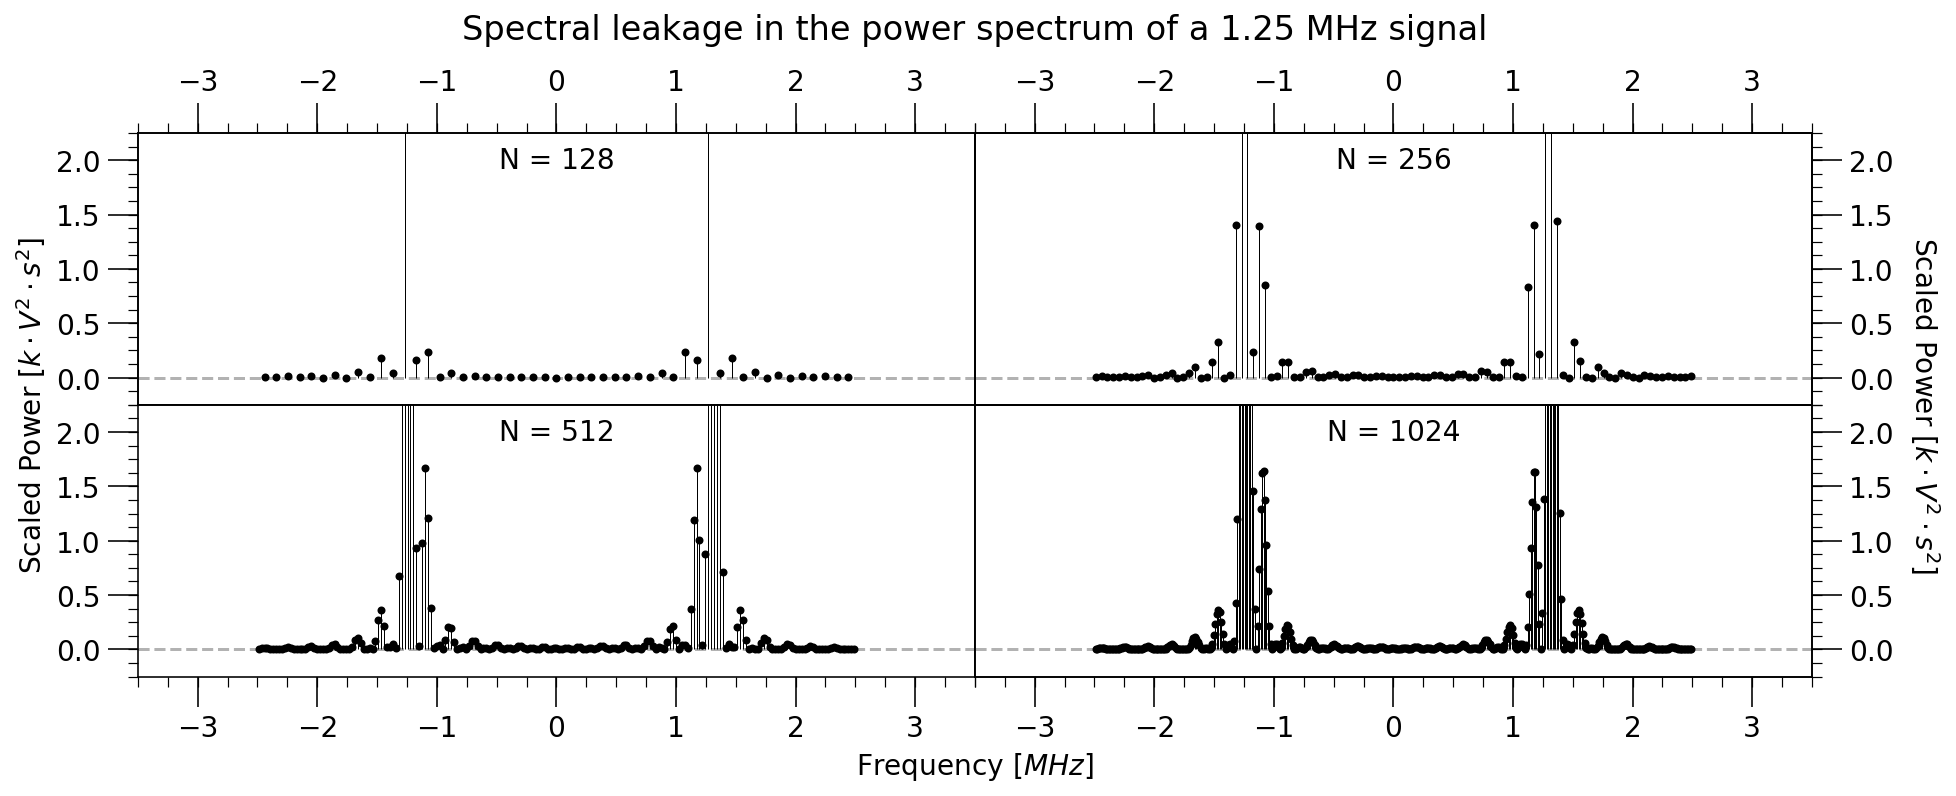

In [27]:
N_values = 2**np.arange(7,11)

PLOT_SCALE = 1e3 / 10

fig, axes = plt.subplots(2,2, figsize = (15,5)) 

for i , ax in enumerate(axes.reshape(-1)):

    # Plot points
    ax.plot(dft_f_range(N_values[i])[abs(dft_f_range(N_values[i])) < 2.5],
            LP_dfts[i][abs(dft_f_range(N_values[i])) < 2.5] / PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            color = 'black',
            markersize = 3)
    
    # Plot baseline
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3)
    
    # Plot connecting lines
    ax.vlines(dft_f_range(N_values[i])[abs(dft_f_range(N_values[i])) < 2.5],
              ymin = 0,
              ymax = LP_dfts[i][abs(dft_f_range(N_values[i])) < 2.5] / PLOT_SCALE,
              color = 'black',
              linewidth = 0.5)


    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # set limits and fix yticks
    ax.set_xlim(-3.5,3.5)
    ax.set_ylim(-.25, 2.25)

    ax.text(0.5, 0.9,
            'N = %d' %N_values[i],
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    # set ticks for left side of plotgrid
    if (i % 2) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.yaxis.set_minor_locator(MultipleLocator(0.125)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
    # set ticks for right side of plotgrid        
    if (i % 2) == 1:
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(0.5))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.125)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
    
#     # set ticks for top side of plotgrid
    if i < 2:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(-3,4))
        ax_top.xaxis.set_major_locator(MultipleLocator(1))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.25))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)


        
#     # set ticks for bottom side of plotgrid
    if i > 1:

        ax.set_xticks(np.arange(-3,4))
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    if i == 0:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', x = 0, y = 0)

    if i == 1:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 65, x= 0, y = 0)
        ax.yaxis.set_label_position('right')

    if i == 2:
        ax.set_xlabel(r'Frequency $[MHz]$', x = 1, y = 0)
    
    
#     if i == 3:





    if i == 1:
        ax.set_title(r'Spectral leakage in the power spectrum of a 1.25 MHz signal', x = 0, y = 1.3)

plt.subplots_adjust(hspace=0, wspace = 0)  
plt.show()
fig.savefig('magnified_leakage_power_3_4.pdf', dpi = 'figure', format = 'pdf', transparent = True, bbox_inches= "tight")